# Analyzing Fuel Economy Data

### Overview

I am going to use pythons pandas, numpy, and matplotlib to analyze fuel economy data for different car models from 2010 and 2014.

I have conducted an Exploratory Data Analysis on both dataset to answer following questions:

1. Are more unique models using alternative fuels in 2014 compared to 2010? By how much?
2. How much have vehicle classes improved in fuel economy \(increased in mpg\)?
3. What are the characteristics of SmartWay vehicles? Have they changed over time? \(mpg, greenhouse gas\)
4. What features are associated with better fuel economy \(mpg\)?
5. For all of the models that were produced in 2010 that are still being produced in 2014, how much has the mpg improved and which vehicle improved the most?



# Assessing Data

We will explore the data and try to answer following questions about the data.
- number of samples in each dataset
- number of columns in each dataset
- duplicate rows in each dataset
- features with missing values
- number of non-null unique values for features in each dataset
- what those unique values are and counts for each

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_10 = pd.read_csv('all_alpha_10.csv')
df_14 = pd.read_csv('all_alpha_14.csv')

In [3]:
df_10.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
df_14.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
# number of samples in each dataset
print('Number of rows in 2010 and 2014 data set respectively are '+str(df_10.shape[0])+' and '+str(df_14.shape[0])+'.\n')
print('Number of columns in 2010 and 2014 data set respectively are '+str(df_10.shape[1])+' and '+str(df_14.shape[1])+'.\n')

Number of rows in 2010 and 2014 data set respectively are 2404 and 1611.

Number of columns in 2010 and 2014 data set respectively are 18 and 18.



In [6]:
# duplicate rows in 2010 dataset
print('Number of duplicate row in 2010 and 2014 dataset respectively are '+str(df_10.duplicated().sum())+' and '
      +str(df_14.duplicated().sum())+'.')

Number of duplicate row in 2010 and 2014 dataset respectively are 25 and 0.


In [7]:
#features with missing values
df_10.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [8]:
df_14.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [9]:
# Data types for each variables in the 2010 dataset
df_10.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [10]:
# # Data types for each variables in the 2014 dataset
df_14.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [11]:
# number of non-null unique values for features in 2010 dataset
df_10.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [12]:
# number of non-null unique values for features in 2014 dataset
df_14.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [13]:
df_10['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [14]:
df_14['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

# Cleaning Column Labels And Dropping Extraneous Columns

1. Drop extraneous columns that are not consistent or aren't relevant to our questions.
   - From 2010 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
   - From 2014 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'
2. Renaming Columns labels
   - Change the "Sales Area" column label in the 2010 dataset to "Cert Region" for consistency.
   - Rename all column labels to replace spaces with underscores and convert everything to lowercase.



### Dropping Extraneous Columns

In [15]:
#dropping extraneous columns from 2010
df_10.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace= True)

# validate changes
df_10.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [16]:
#dropping extraneous columns from 2014
df_14.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

#validate changes
df_14.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


### Renaming Columns

In [17]:
# Renaming "Sales Area" column label in the 2010 dataset to "Cert Region" for consistency.
df_10.rename(columns={"Sales Area": "Cert Region"}, inplace=True)

# validate changes
df_10.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [18]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_10.rename(columns=lambda x : x.strip().lower().replace(' ','_'), inplace=True)

# validate changes
df_10.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [19]:
# replace spaces with underscores and lowercase labels for 201 dataset
df_14.rename(columns=lambda x : x.strip().lower().replace(' ','_'), inplace=True)

#validate changes
df_14.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [20]:
# confirm column labels for 2010 and 2014 datasets are identical
df_10.columns == df_14.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

# Filter, Drop Nulls, Dedupe
1. Filter: For consistency, only compare cars certified by California standards.
2. Drop Nulls: Drop any rows in both datasets that contain missing values.
3. Dedupe: Drop any duplicate rows in both datasets.

## Filter Data

In [21]:
# filter datasets for rows following California standards
df_10 = df_10.query('cert_region == "CA"')
df_14 = df_14.query('cert_region == "CA"')

In [22]:
# confirm only certification region is California
df_14['cert_region'].unique()

array(['CA'], dtype=object)

In [23]:
# drop certification region columns form both datasets
if 'cert_region' in df_10.columns:
    df_10.drop('cert_region', axis=1, inplace=True)
else:
    print("'cert_region' column not found in df_10")

if 'cert_region' in df_14.columns:
    df_14.drop('cert_region', axis=1, inplace=True)
else:
    print("'cert_region' column not found in df_14")

In [24]:
df_10.shape

(1084, 13)

In [25]:
df_14.shape

(798, 13)

## Drop Rows with Missing Values

In [26]:
# view missing value count for each feature in 2010
df_10.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [27]:
# view missing value count for each feature in 2018
df_14.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [28]:
# drop rows with any null values in both datasets
df_10.dropna(inplace=True)
df_14.dropna(inplace=True)

In [29]:
# checks if any of columns in 2010 have null values - should print False
df_10.isnull().sum().any()

False

In [30]:
# checks if any of columns in 2010 have null values - should print False
df_14.isnull().sum().any()

False

## Dedupe Data

In [31]:
# duplicate rows in both dataset
print('Number of duplicate row in 2010 and 2014 dataset respectively are '+str(df_10.duplicated().sum())+' and '
      +str(df_14.duplicated().sum())+'.')

Number of duplicate row in 2010 and 2014 dataset respectively are 23 and 3.


In [32]:
#drop duplicates in both dataset
df_10.drop_duplicates(inplace=True)
df_14.drop_duplicates(inplace=True)

In [33]:
# check for duplicate rows in both dataset again
print('Number of duplicate row in 2010 and 2014 dataset respectively are '+str(df_10.duplicated().sum())+' and '
      +str(df_14.duplicated().sum())+'.')

Number of duplicate row in 2010 and 2014 dataset respectively are 0 and 0.


# Inspecting Data Types
Inspect the data types in both dataset and make necessary changes.

In [34]:
# inspect the datatypes for 200 data
df_10.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [35]:
# inspect the datatypes for 2014 data
df_14.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [36]:
# check value counts for the 2010 cyl column
df_10['cyl'].value_counts()

cyl
(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: count, dtype: int64

In [37]:
# check value counts for the 2014 cyl column
df_14['cyl'].value_counts()

cyl
4.0     365
6.0     246
8.0     153
3.0      18
12.0      9
5.0       2
16.0      1
Name: count, dtype: int64

Fixing `cyl` Data Type

- 2010: extract int from string
- 2014: convert float to int



In [38]:
# Extract int from strings in the 2010 cyl column
df_10['cyl'] = df_10.cyl.str.extract('(\d+)').astype(int)

In [39]:
# Check value counts for 2010 cyl column again to confirm the change
df_10.cyl.value_counts()

cyl
6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: count, dtype: int64

In [40]:
# convert 2014 cyl column to int
df_14.cyl = df_14.cyl.astype(int)

In [41]:
# Check value counts for 2014 cyl column again to confirm the change
df_14.cyl.value_counts()

cyl
4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: count, dtype: int64

# Fixing `air_pollution_score` Data Type

- 2010 convert string to float
- 2014: convert int to float



In [42]:
if 'Air Pollution Score' in df_10.columns:
    df_10['Air Pollution Score'].value_counts()
else:
    print('Column not found: Air Pollution Score')

Column not found: Air Pollution Score


# Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [43]:
if 'Air Pollution Score' in df_10.columns:
    filtered_df = df_10[df_10['Air Pollution Score'] == '6/4']
else:
    print("Column 'Air Pollution Score' does not exist in the DataFrame")

Column 'Air Pollution Score' does not exist in the DataFrame


In [44]:
for col_name in df_10.columns:
    print(df_10[col_name].value_counts())

model
NISSAN Altima             12
HONDA Accord              11
FORD Ranger               10
DODGE RAM 1500             9
SUBARU Legacy              8
                          ..
MERCEDES-BENZ S65 AMG      1
MERCEDES-BENZ SL55 AMG     1
MERCEDES-BENZ SL550        1
MERCEDES-BENZ SL600        1
ACURA MDX                  1
Name: count, Length: 377, dtype: int64
displ
2.4    96
2.5    89
3.5    87
3.0    71
2.0    59
3.6    53
4.0    40
3.7    38
2.3    35
2.7    32
3.8    26
5.3    26
4.6    24
4.2    22
4.7    22
6.0    19
5.7    18
1.8    18
2.2    17
3.2    17
5.4    14
6.2    14
5.0    13
5.5    13
4.8    11
4.3    11
3.3    11
3.1     9
1.6     8
3.4     8
4.4     8
5.6     8
1.5     6
2.8     6
5.9     6
6.1     6
6.5     5
6.7     5
4.5     3
3.9     3
1.3     3
5.2     2
8.4     2
8.0     1
7.0     1
Name: count, dtype: int64
cyl
6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: count, dtype: int64
trans
Auto-L4    176
Auto-S6    162
Auto-L5 

In [45]:
for col_name in df_14.columns:
    print(df_14[col_name].value_counts())

model
FORD F150                    22
CHEVROLET Silverado 15       13
GMC Sierra 15                13
CHEVROLET Camaro              8
CHEVROLET Colorado            8
                             ..
MERCEDES-BENZ E300 4Matic     1
MERCEDES-BENZ GLA 250         1
BMW X4 xDrive28i              1
MERCEDES-BENZ GLC 300         1
KIA Sedona                    1
Name: count, Length: 357, dtype: int64
displ
2.0    211
3.0    113
3.6     50
2.5     37
2.4     35
5.3     34
1.5     34
3.5     29
1.6     26
6.2     24
1.4     18
4.0     18
3.3     18
5.7     18
1.8     15
5.0     13
4.4     13
3.7     10
2.7      9
6.4      8
3.9      7
3.8      6
4.7      6
2.8      5
5.5      5
6.5      5
3.2      4
5.6      4
1.2      4
4.3      4
4.6      3
2.9      3
6.0      2
6.3      1
6.6      1
8.0      1
Name: count, dtype: int64
cyl
4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: count, dtype: int64
trans
SemiAuto-8     172
SemiAuto-6     128
Man-6           82
Auto-6      

# It's not just the air pollution score!

The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."

Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above \(it uses ethanol AND gas\) will have a string that holds two values \- one for each. This is a little tricky, so I'm going to show you how to do it with the 2010 dataset, and then you'll try it with the 2014 dataset.


In [46]:
# First, let's get all the hybrids in 2008
hb_10 = df_10[df_10['fuel'].str.contains('/')]
hb_10

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [47]:
# hybrids in 2014
hb_14 = df_14[df_14['fuel'].str.contains('/')]
hb_14

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [48]:
# create two copies of the 2010 hybrids dataframe
df1 = hb_10.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_10.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [49]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [50]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [51]:
# check that all the original hybrid rows with "/"s are gone
df_10[df_10['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [52]:
df_10.shape

(986, 13)

# Repeat this process for the 2014 dataset



In [53]:
# create two copies of the 2014 hybrids dataframe
df1 = hb_14.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_14.copy()  # data on second fuel type of each hybrid vehicle

### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`

We don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2014 dataset.


In [54]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x : x.split('/')[0])
    df2[c] = df2[c].apply(lambda x : x.split('/')[1])

In [55]:
# check that they're gone
df_14[df_14['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [56]:
df_14.shape

(794, 13)

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:

- 2010 convert string to float
- 20143: convert int to float



In [57]:
# convert int to float for 2014 air pollution column
df_14.air_pollution_score = df_14.air_pollution_score.astype(float)

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [58]:
# convert mpg columns to float
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for col in mpg_columns:
    df_10[col] = pd.to_numeric(df_10[col], errors='coerce')
    df_14[col] = pd.to_numeric(df_14[col], errors='coerce')

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [59]:
# convert from string to int
df_10['greenhouse_gas_score'] = df_14['greenhouse_gas_score'].astype(int)

In [60]:
# Check if all the datatypes are fixed
df_10.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score    float64
smartway                 object
dtype: object

In [61]:
df_14.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [62]:
df_10.dtypes == df_14.dtypes

model                    True
displ                    True
cyl                      True
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score     False
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score    False
smartway                 True
dtype: bool

# Exploring With Visuals

### We are going to use histogram and scatter plot to explore the data and explore following questions:

1. Compare the distribution of the greenhouse gas score in 2010 and 2014.
   - The distribution for 2010is more skewed to the left.
2. How has the distribution of the combined mpg changed from 2010 to 2014?
   - The distribution has become more skewed to the right.
3. Describe the correlation between displacement and combined mpg.
   - There is a negative correlation between displacement and combined mpg.
4. Describe the correlation between greenhouse gas score and combined mpg.
   - There is a positive correlation between greenhouse gas score and combined mpg.



### Compare the distributions of greenhouse gas score in 2008 and 2018 using histograms


Text(0, 0.5, 'Count')

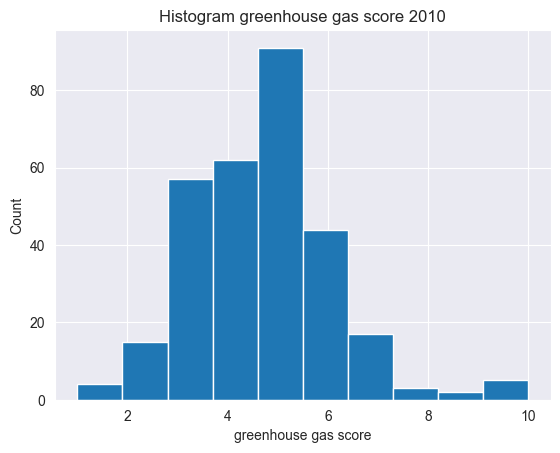

In [63]:
plt.hist(df_10['greenhouse_gas_score'])
plt.title('Histogram greenhouse gas score 2010')
plt.xlabel('greenhouse gas score')
plt.ylabel('Count')

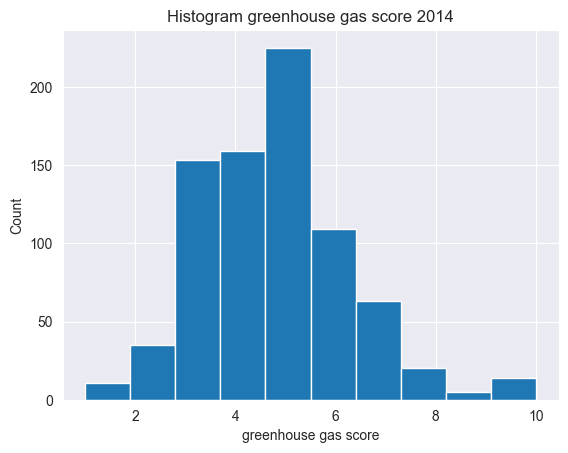

In [64]:
plt.hist(df_14['greenhouse_gas_score'])
plt.title('Histogram greenhouse gas score 2014')
plt.xlabel('greenhouse gas score')
plt.ylabel('Count');

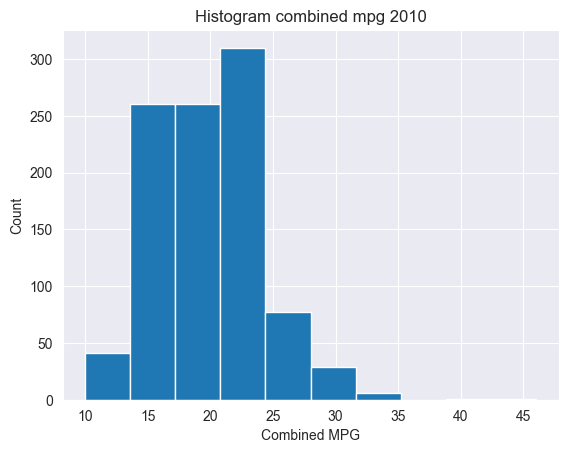

In [65]:
plt.hist(df_10['cmb_mpg'])
plt.title('Histogram combined mpg 2010')
plt.xlabel('Combined MPG')
plt.ylabel('Count');

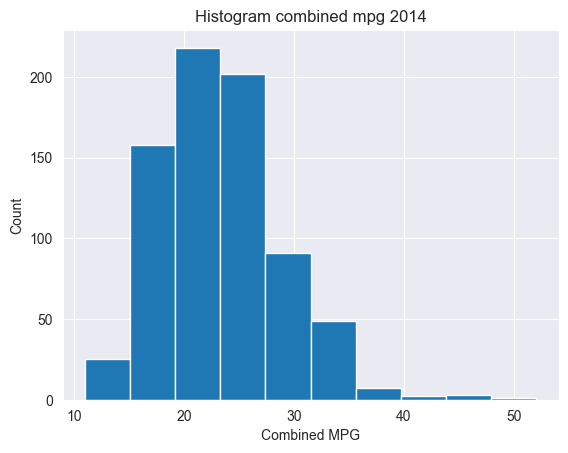

In [66]:
plt.hist(df_14['cmb_mpg'])
plt.title('Histogram combined mpg 2014')
plt.xlabel('Combined MPG')
plt.ylabel('Count');

### Exploring the correlation between displacement and combined mpg using scatterplot.


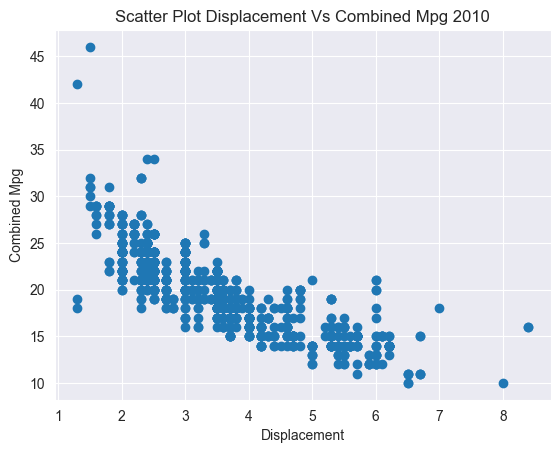

In [67]:
plt.scatter(df_10['displ'],df_10['cmb_mpg'])
plt.title('Scatter Plot Displacement Vs Combined Mpg 2010')
plt.xlabel('Displacement')
plt.ylabel('Combined Mpg');

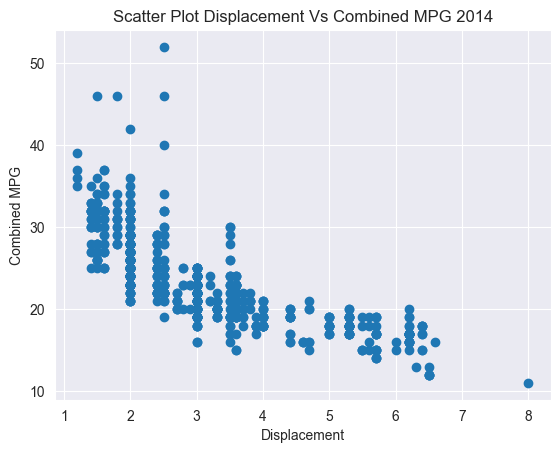

In [68]:
plt.scatter(df_14['displ'],df_14['cmb_mpg'])
plt.title('Scatter Plot Displacement Vs Combined MPG 2014')
plt.xlabel('Displacement')
plt.ylabel('Combined MPG');

### Exploring the correlation between greenhouse gas score and combined mpg using scatterplot.


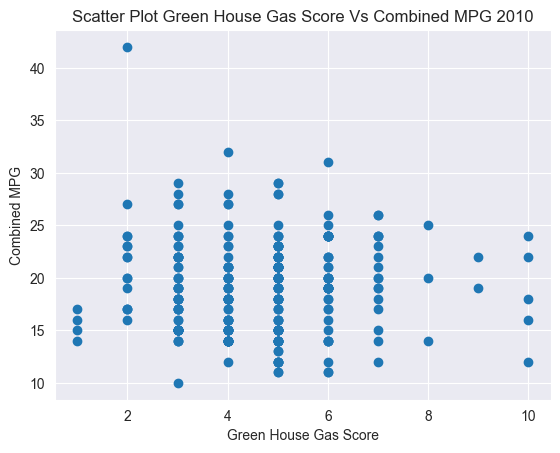

In [69]:
plt.scatter(df_10['greenhouse_gas_score'],df_10['cmb_mpg'])
plt.title('Scatter Plot Green House Gas Score Vs Combined MPG 2010')
plt.xlabel('Green House Gas Score')
plt.ylabel('Combined MPG');

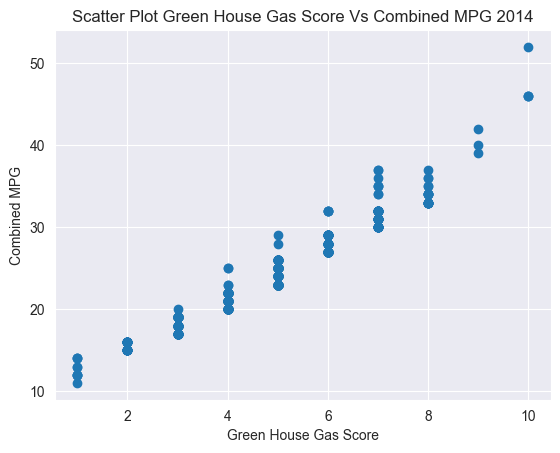

In [70]:
plt.scatter(df_14['greenhouse_gas_score'],df_14['cmb_mpg'])
plt.title('Scatter Plot Green House Gas Score Vs Combined MPG 2014')
plt.xlabel('Green House Gas Score')
plt.ylabel('Combined MPG');

# Conclusion And Visual

Now we are going to draw conclusion, create visuals to answer the following questions:

1. Are more unique models using alternative fuels in 2014 compared to 2010? By how much?
2. How much have vehicle classes improved in fuel economy \(increased in mpg\)?
3. What are the characteristics of SmartWay vehicles? Have they changed over time? \(mpg, greenhouse gas\)
4. What features are associated with better fuel economy \(mpg\)?
5. For all of the models that were produced in 2010 that are still being produced in 201, how much has the mpg improved and which vehicle improved the most?



### Q1: Are more unique models using alternative sources of fuel? By how much?

Lets first explore what are the sources of fuels and which ones are alternative.

In [71]:
df_10.fuel.value_counts()

fuel
Gasoline       984
CNG              1
ethanol/gas      1
Name: count, dtype: int64

In [72]:
df_14.fuel.value_counts()

fuel
Gasoline                737
Ethanol/Gas              26
Diesel                   19
Gasoline/Electricity     12
Name: count, dtype: int64

Alternative sources of fuel available in 2010 are CNG and ethanol, and those in 2014 are ethanol and electricity.


In [73]:
#how many unique models are using alternative source of fuel in 2010
alt_10 = df_10.query('fuel in ["CNG", "ethanol"]').model.nunique()

print(str(alt_10)+" unique models are using alternative source of fuel in 2010")

1 unique models are using alternative source of fuel in 2010


In [74]:
#how many unique models are using alternative source of fuel in 2014
alt_14 = df_14.query('fuel in ["Electricity", "Ethanol"]').model.nunique()

print(str(alt_14)+" unique models are using alternative source of fuel in 2014")

0 unique models are using alternative source of fuel in 2014


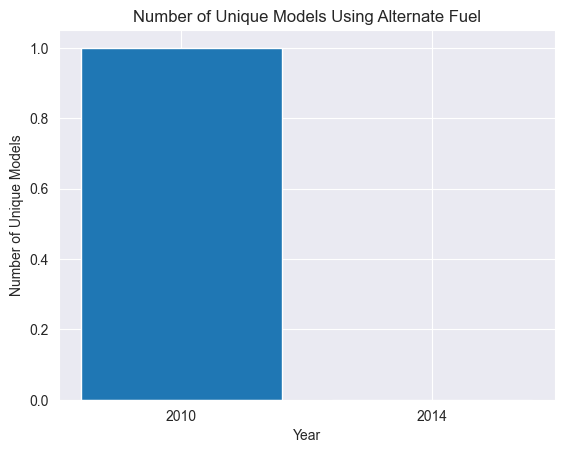

In [75]:
plt.bar(['2010','2014'],[alt_10, alt_14])
plt.title('Number of Unique Models Using Alternate Fuel')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models');

Since 2010, the number of unique models using alternative sources of fuel increased by 24.


#### Let us look at proportions.

In [76]:
#total unique models 
total_10 = df_10.model.nunique()
total_14 = df_14.model.nunique()

total_10,total_14

(377, 357)

In [77]:
#Calculating proportions
prop_10 = alt_10/total_10
prop_14 = alt_14/total_14

prop_10,prop_14

(0.002652519893899204, 0.0)

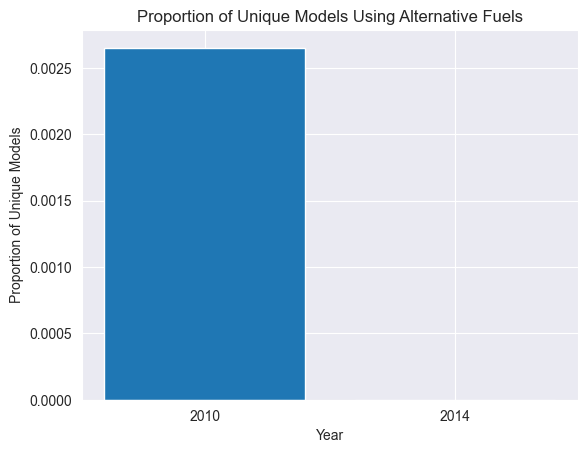

In [78]:
plt.bar(["2010", "2014"], [prop_10,prop_14])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

Lets explore the the average fuel economy for each vehicle class

In [79]:
veh_10 = df_10.groupby('veh_class').cmb_mpg.mean()
veh_10

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.123867
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [80]:
veh_14 = df_14.groupby('veh_class').cmb_mpg.mean()
veh_14

veh_class
large car          23.381579
midsize car        26.643939
minivan            20.800000
pickup             19.171875
small SUV          23.870000
small car          24.077491
special purpose    18.500000
standard SUV       18.203125
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [81]:
#Improvements in the average fuel economy for each class
inc = veh_14-veh_10
inc[1]

4.872488038277513

Text(0, 0.5, 'Increase in Average Combined MPG')

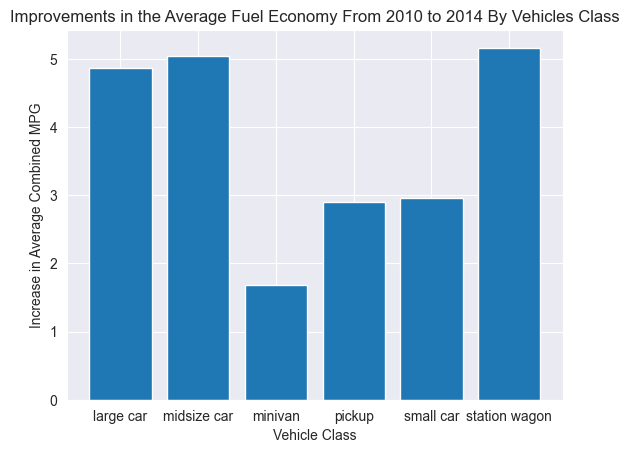

In [82]:
#plotting vehicles classes that exist in both year
inc.dropna(inplace=True)
plt.bar(inc.index,inc)
plt.title('Improvements in the Average Fuel Economy From 2010 to 2014 By Vehicles Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG')

In [83]:
inc

veh_class
large car        4.872488
midsize car      5.042490
minivan          1.682353
pickup           2.894767
small car        2.953624
station wagon    5.162745
Name: cmb_mpg, dtype: float64

# Q3. What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

We will analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [84]:
df_10.smartway.value_counts()

smartway
no     606
yes    380
Name: count, dtype: int64

In [85]:
# Get all smartway vehicles in 2010
smart_10 = df_10.query('smartway == "yes"')

In [86]:
df_10.describe()

,displ,cyl,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,986.000000,986.000000,985.000000,985.000000,985.000000,300.000000
mean,3.497566,6.022312,17.389848,24.042640,19.791878,4.610000
std,1.242012,1.861038,4.089733,4.755422,4.252968,1.572517
min,1.300000,2.000000,8.000000,13.000000,10.000000,1.000000
25%,2.500000,4.000000,15.000000,20.000000,17.000000,3.000000
50%,3.500000,6.000000,17.000000,24.000000,20.000000,5.000000
75%,4.200000,6.000000,20.000000,27.000000,22.000000,5.000000
max,8.400000,16.000000,48.000000,45.000000,46.000000,10.000000


In [87]:
#Explore smartway vehicles in 2010.
smart_10.describe()

,displ,cyl,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,97.000000
mean,2.602895,4.826316,20.984211,28.413158,23.736842,4.659794
std,0.623436,1.002025,3.442672,3.075194,3.060379,1.593519
min,1.300000,4.000000,17.000000,22.000000,20.000000,2.000000
25%,2.275000,4.000000,19.000000,26.000000,22.000000,3.000000
50%,2.400000,4.000000,20.000000,28.000000,23.000000,5.000000
75%,3.000000,6.000000,22.000000,30.000000,25.000000,6.000000
max,5.000000,8.000000,48.000000,45.000000,46.000000,10.000000


In [88]:
df_14.smartway.value_counts()

smartway
No       697
Yes       87
Elite     10
Name: count, dtype: int64

In [89]:
df_14.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,794.000000,794.000000,794.000000,756.000000,756.000000,756.000000,794.000000
mean,3.055919,5.476071,3.973552,20.783069,28.349206,23.575397,4.711587
std,1.349381,1.754851,1.824053,5.062840,5.740274,5.255171,1.653058
min,1.200000,3.000000,1.000000,9.000000,14.000000,11.000000,1.000000
25%,2.000000,4.000000,3.000000,17.000000,24.000000,20.000000,3.250000
50%,2.950000,6.000000,3.000000,20.000000,28.000000,23.000000,5.000000
75%,3.600000,6.000000,5.000000,23.250000,32.000000,27.000000,6.000000
max,8.000000,16.000000,7.000000,51.000000,53.000000,52.000000,10.000000


In [90]:
# Get all smartway vehicles in 2014
smart_14 = df_14.query('smartway in ["Yes","Elite"]')
smart_14.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,97.000000,97.000000,97.000000,86.000000,86.000000,86.000000,97.000000
mean,1.779381,3.938144,5.175258,30.000000,38.093023,33.093023,7.711340
std,0.423266,0.428525,1.779573,4.886957,3.781154,3.995962,1.060255
min,1.200000,3.000000,3.000000,26.000000,30.000000,30.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,28.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,30.000000,39.750000,33.750000,8.000000
max,3.500000,6.000000,7.000000,51.000000,53.000000,52.000000,10.000000


Higher fuel economy and better greenhouse gas score are the characteristics of a SmartWay vehicle.

The average combined mpg has improved from 23.73 to 37.36 between 2010 to 2014. That is more than top 75% of vehicles in 2010\(25.00\). That is a significant improvement in the fuel economy of the SmartWay vehicles.

The average greenhouse gas score has improved from 6.88 to 7.93 between 2010 to 2014. That is more than top 75% of vehicles in 2010\(7.00\). That is a significant improvement in the greenhouse gas score of the SmartWay vehicles.



## Q4: What features are associated with better fuel economy?

I am going to explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset.

In [91]:
top_10 = df_10.query('cmb_mpg > cmb_mpg.mean()')
top_10.describe()

,displ,cyl,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,518.000000,518.000000,518.000000,518.000000,518.000000,134.000000
mean,2.667181,4.888031,20.322394,27.608108,22.996139,4.768657
std,0.666034,1.034703,3.199722,3.051919,2.927886,1.584294
min,1.300000,4.000000,17.000000,20.000000,20.000000,2.000000
25%,2.300000,4.000000,18.000000,25.000000,21.000000,4.000000
50%,2.500000,4.000000,20.000000,27.000000,22.000000,5.000000
75%,3.000000,6.000000,21.000000,29.000000,24.000000,6.000000
max,6.000000,8.000000,48.000000,45.000000,46.000000,10.000000


In [92]:
top_14 = df_14.query('cmb_mpg > cmb_mpg.mean()')
top_14.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,2.072113,4.183099,4.676056,24.845070,33.095775,27.943662,5.912676
std,0.496354,0.691144,1.869882,4.145135,4.093106,3.936241,1.055378
min,1.200000,3.000000,1.000000,20.000000,27.000000,24.000000,4.000000
25%,1.800000,4.000000,3.000000,22.000000,30.000000,25.000000,5.000000
50%,2.000000,4.000000,5.000000,24.000000,32.000000,27.000000,6.000000
75%,2.000000,4.000000,7.000000,27.000000,35.000000,30.000000,7.000000
max,3.600000,6.000000,7.000000,51.000000,53.000000,52.000000,10.000000


Fewer number of cyl and lower displacement for vehicles is associated with better fuel economy.

### Q5: For all of the models that were produced in 2010that are still being produced in 2014, how much has the mpg improved and which vehicle improved the most?

This is a question regarding models that were updated since 2010 and still being produced in 2014. In order to do this, we need a way to compare models that exist in both datasets. To do this, we are goig to merge two datasets.



### Creat combined dataset

In [93]:
#rename 2010 dataset
df_10.rename(columns=lambda x :x[:10]+ "_2010", inplace=True)

In [94]:
#check the name
df_10.head(1)

,model_2010,displ_2010,cyl_2010,trans_2010,drive_2010,fuel_2010,veh_class_2010,air_pollut_2010,city_mpg_2010,hwy_mpg_2010,cmb_mpg_2010,greenhouse_2010,smartway_2010
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15.0,20.0,17.0,NaN,no


In [95]:
#merge data set
df_combined = df_10.merge(df_14, how = 'inner', left_on='model_2010', right_on='model')

In [96]:
# check the df_combined
df_combined.head()

,model_2010,displ_2010,cyl_2010,trans_2010,drive_2010,fuel_2010,veh_class_2010,air_pollut_2010,city_mpg_2010,hwy_mpg_2010,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2010 and 2014 for each unique model

To do this, we wil group by `model` and find the mean `cmb_mpg_2010` and mean `cmb_mpg` for each.


In [97]:
model_mpg = df_combined['model'] = df_combined['model'].str.replace('[^0-9]', '')

In [98]:
model_mpg.head()

0    ACURA RDX
1    ACURA RDX
2      AUDI A3
3      AUDI A3
4      AUDI A3
Name: model, dtype: object

2. Create a new column, `mpg_change`, with the change in mpg

Subtract the mean mpg in 2010 from that in 2014 to get the change in mpg


In [99]:
model_mpg.head()

0    ACURA RDX
1    ACURA RDX
2      AUDI A3
3      AUDI A3
4      AUDI A3
Name: model, dtype: object